# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
pd.pandas.set_option('display.max_columns', None)

# Read Dataset

In [18]:
dataset = pd.read_csv('train.csv')

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [20]:
dataset.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Analysis

<font size='12px'>
1. Missing Values<br/>
2. Distribution of the Numerical Variables<br/>
3. Catigorical Variables  <br/>
4. Cardinality of Categorical Variables  <br/>
5. Oulliers  <br/>
6. Relationship betweem independent(X) and dependent(y) features  <br/>
</font>

## 1. Missing Values

In [21]:
columns_with_na = [columns for columns in dataset.columns if dataset[columns].isnull().sum() > 1]

for column_with_na in columns_with_na:
    print('Percentage of null values in {}, is {:.4f}%'.format(column_with_na, dataset[column_with_na].isnull().mean() * 100))

Percentage of null values in LotFrontage, is 17.7397%
Percentage of null values in Alley, is 93.7671%
Percentage of null values in MasVnrType, is 0.5479%
Percentage of null values in MasVnrArea, is 0.5479%
Percentage of null values in BsmtQual, is 2.5342%
Percentage of null values in BsmtCond, is 2.5342%
Percentage of null values in BsmtExposure, is 2.6027%
Percentage of null values in BsmtFinType1, is 2.5342%
Percentage of null values in BsmtFinType2, is 2.6027%
Percentage of null values in FireplaceQu, is 47.2603%
Percentage of null values in GarageType, is 5.5479%
Percentage of null values in GarageYrBlt, is 5.5479%
Percentage of null values in GarageFinish, is 5.5479%
Percentage of null values in GarageQual, is 5.5479%
Percentage of null values in GarageCond, is 5.5479%
Percentage of null values in PoolQC, is 99.5205%
Percentage of null values in Fence, is 80.7534%
Percentage of null values in MiscFeature, is 96.3014%


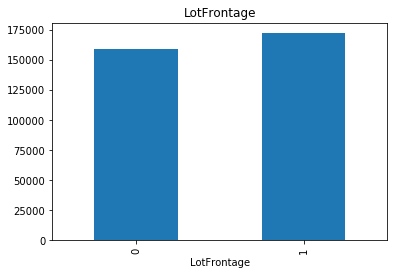

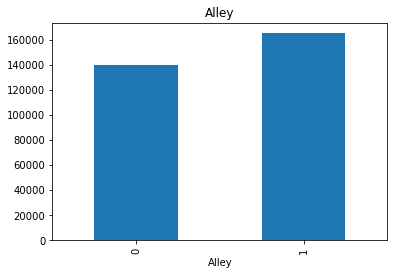

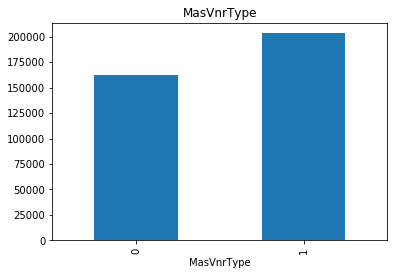

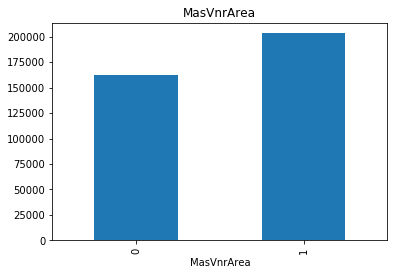

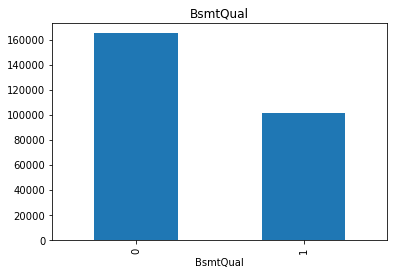

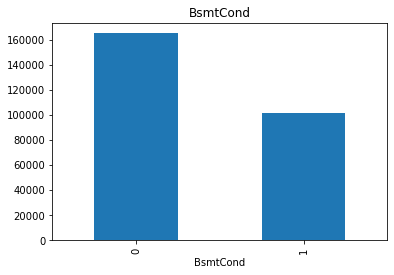

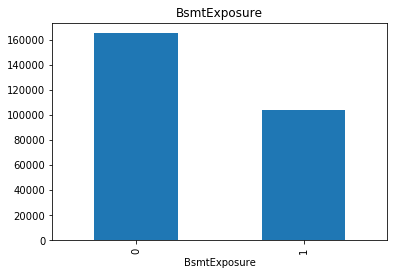

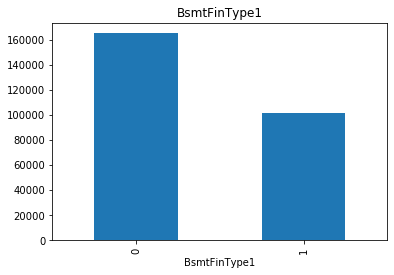

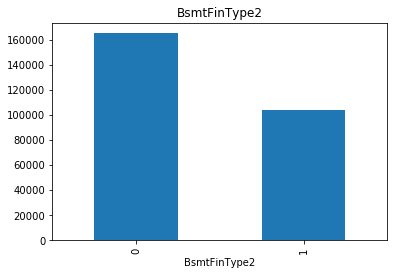

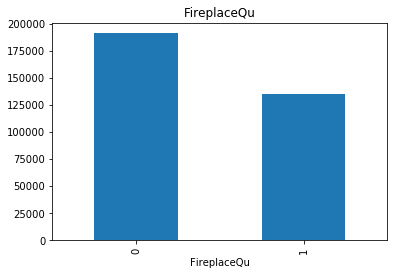

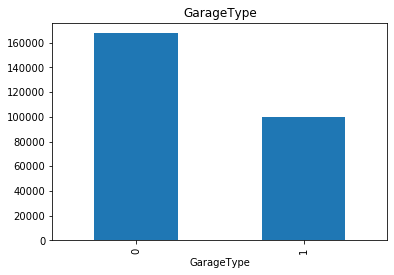

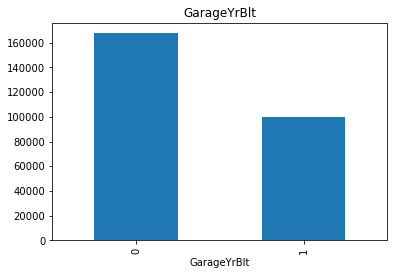

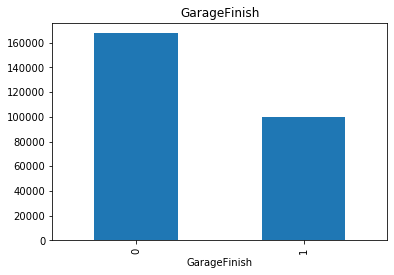

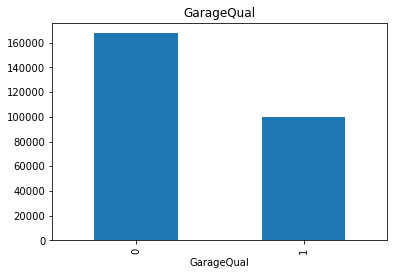

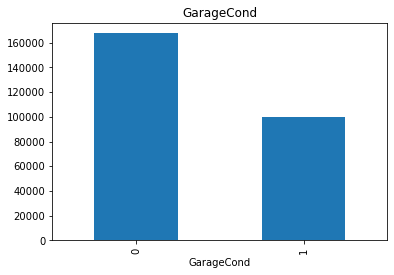

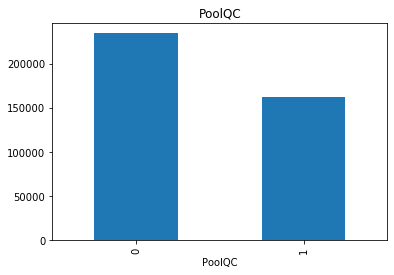

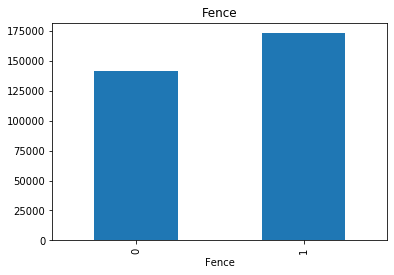

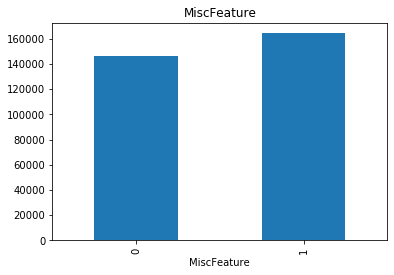

In [26]:
for column_with_na in columns_with_na:
    data = dataset[column_with_na].copy()
    
    data[column_with_na] = np.where(data[column_with_na].isnull(), 1, 0)
    
    data.groupby(column_with_na)['SalePrice'].median().plot.bar()
    plt.title(column_with_na)
    plt.show()

## 2. Numerical Variables

In [28]:
numerical_columns = [column for column in dataset.columns if dataset[column].dtype != 'O']

for numerical_column in numerical_columns:
    print(f'{numerical_column}')

print(f'Total Number of Numerical columns are {len(numerical_columns)}')

Id
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice
Total Number of Numerical columns are 38


In [31]:
# temporal variables
columns_with_year = [column for column in dataset.columns if 'Yr' in column or 'Year' in column]

In [32]:
for column_with_year in columns_with_year:
    print(f'{column_with_year}: {data[column_with_year].nunique()}')

YearBuilt: 112
YearRemodAdd: 61
GarageYrBlt: 97
YrSold: 5


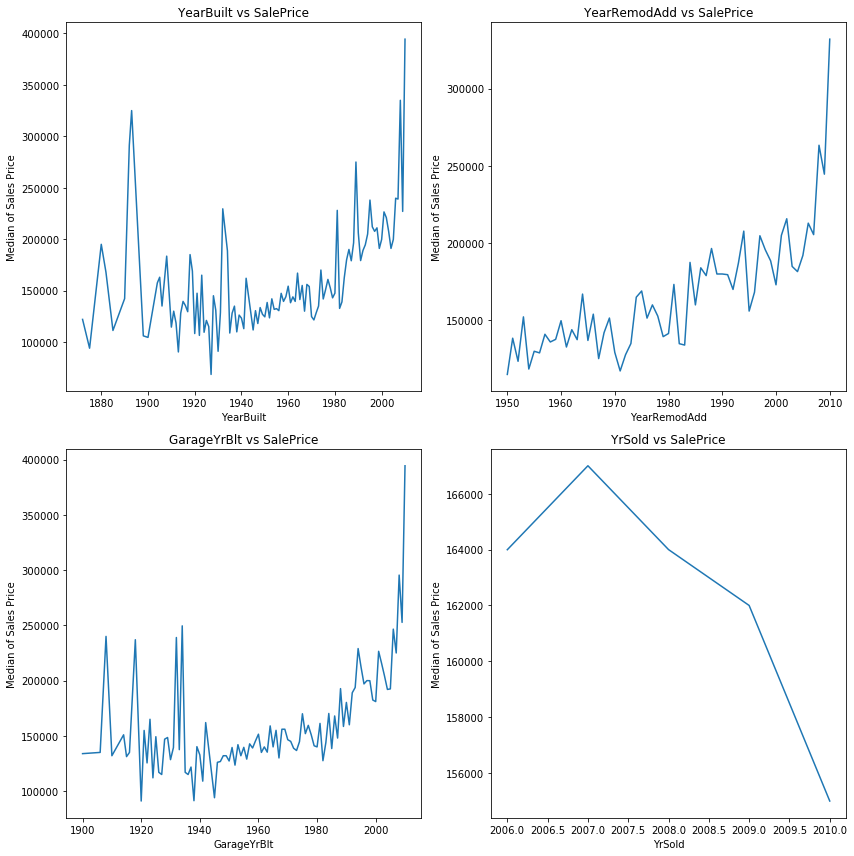

In [63]:
fig, axes = plt.subplots( 2, 2, figsize=(12,12))
col = 0

for ax in axes:
    for index in range(0, len(ax)):
        ax[index].plot(dataset.groupby(columns_with_year[col])['SalePrice'].median())
        ax[index].set_title(f'{columns_with_year[col]} vs SalePrice')
        ax[index].set_xlabel(f'{columns_with_year[col]}')
        ax[index].set_ylabel('Median of Sales Price')
        col += 1
plt.tight_layout()
plt.show()

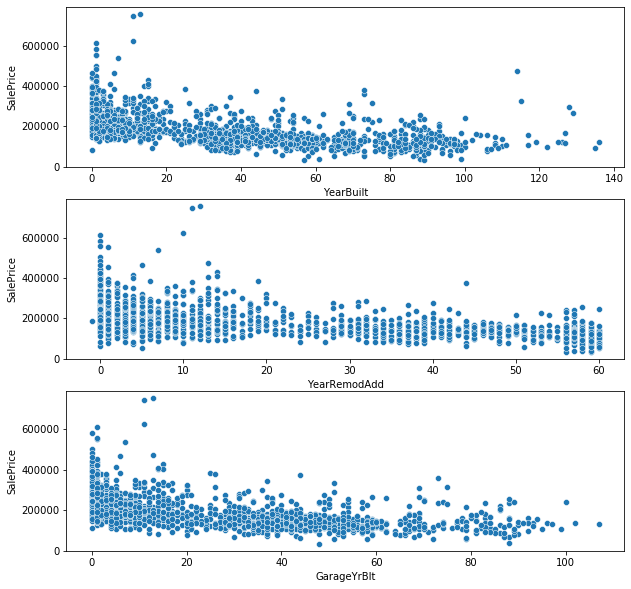

In [71]:
fig, axes = plt.subplots(3,1, figsize=(10,10))
ax = 0

for column_with_year in columns_with_year:
    if column_with_year != 'YrSold':
        data = dataset.copy()
        
        data[column_with_year] = data['YrSold'] - data[column_with_year]
        
        sns.scatterplot(x=data[column_with_year], y=data['SalePrice'], ax=axes[ax])

        ax += 1

In [75]:
discrete_variables = [col for col in numerical_columns if len(dataset[col].unique()) < 25 and col not in columns_with_year + ['Id']]

for discrete_variable in discrete_variables:
    print(discrete_variable)
    
print(f'Total: {len(discrete_variables)}')

MSSubClass
OverallQual
OverallCond
LowQualFinSF
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageCars
3SsnPorch
PoolArea
MiscVal
MoSold
Total: 17


In [76]:
cont_variables = [col for col in numerical_columns if len(dataset[col].unique()) > 25 and col not in columns_with_year + ['Id']]

for cont_variable in cont_variables:
    print(cont_variable)
    
print(f'Total: {len(cont_variables)}')

LotFrontage
LotArea
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
GrLivArea
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
ScreenPorch
SalePrice
Total: 16


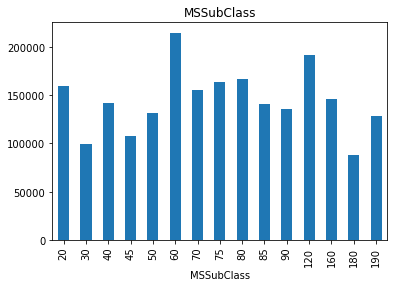

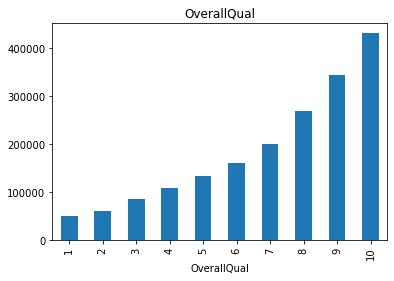

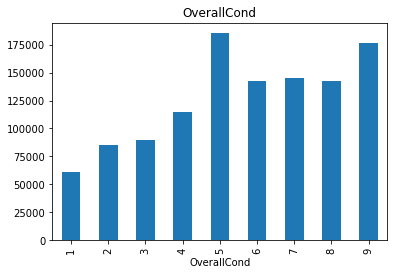

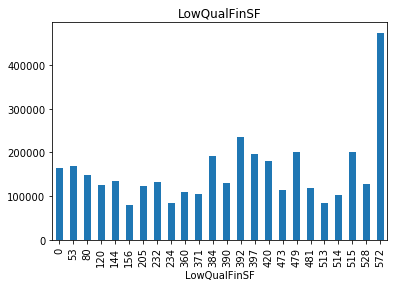

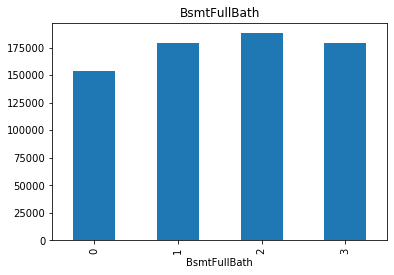

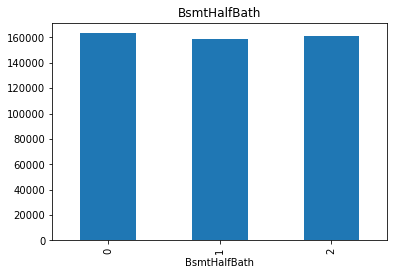

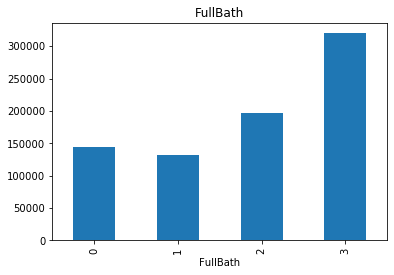

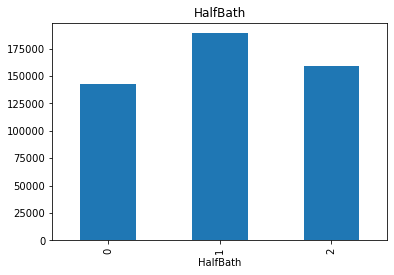

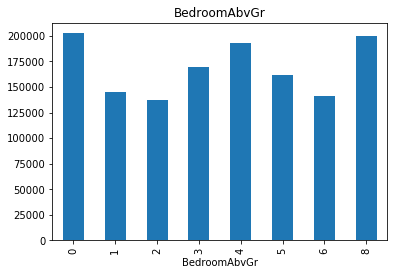

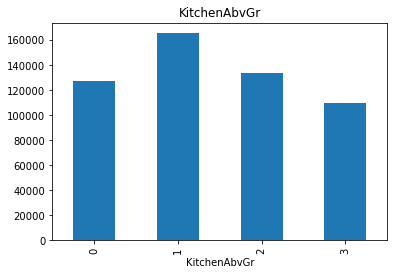

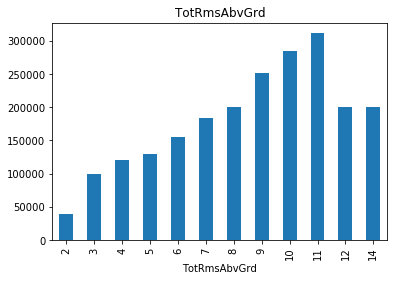

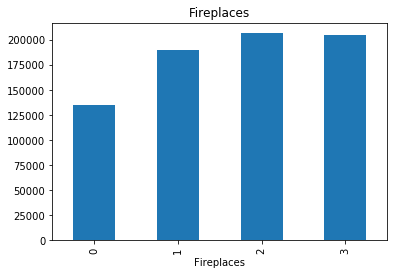

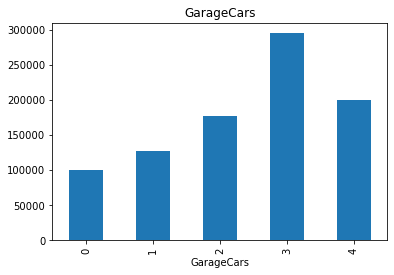

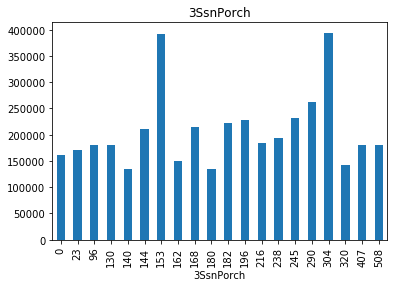

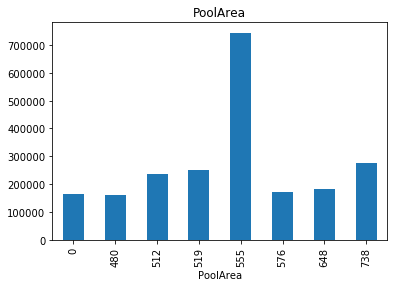

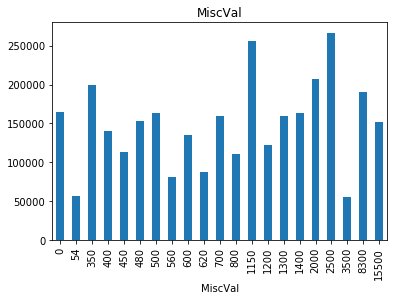

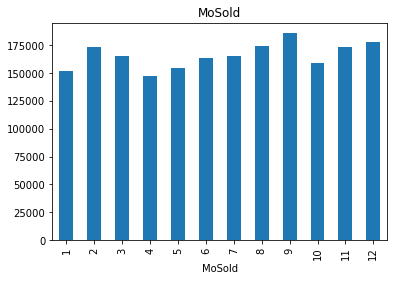

In [79]:
for discrete_variable in discrete_variables:    
    dataset.groupby(discrete_variable)['SalePrice'].median().plot.bar()
    plt.title(discrete_variable)
    plt.show()

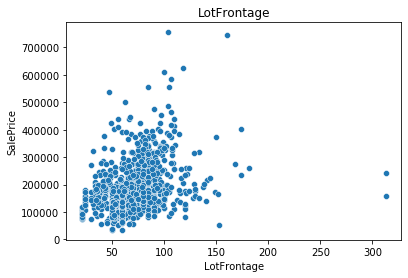

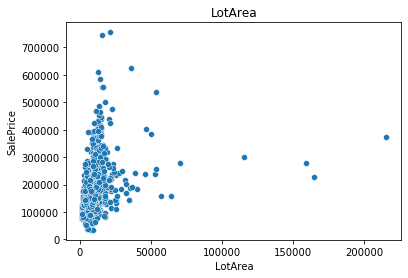

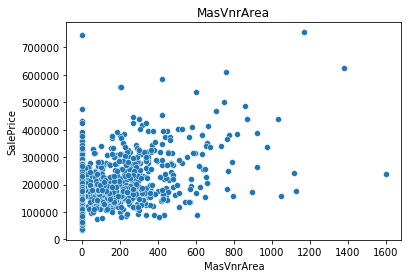

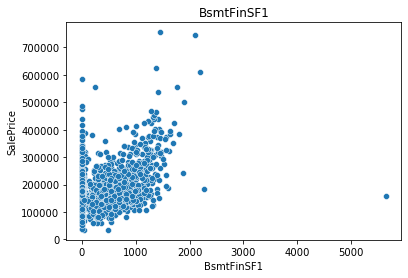

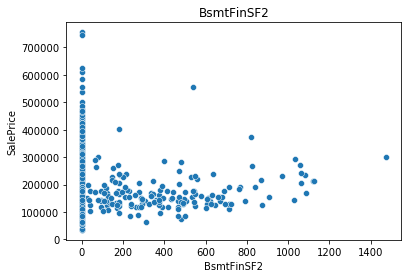

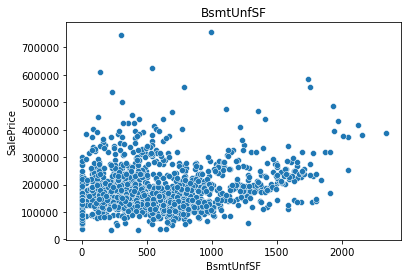

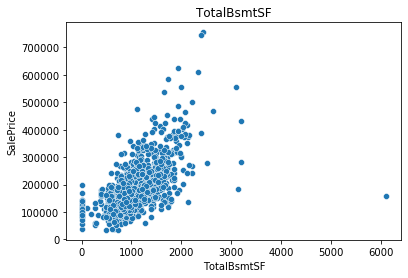

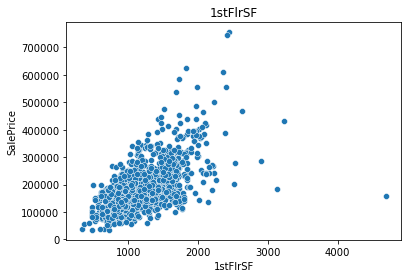

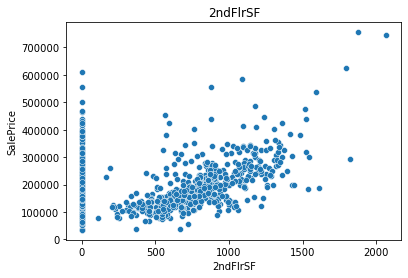

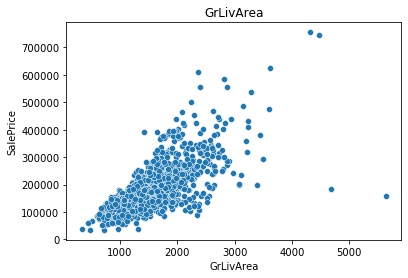

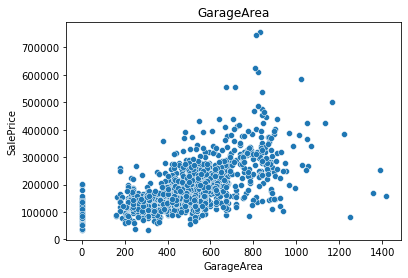

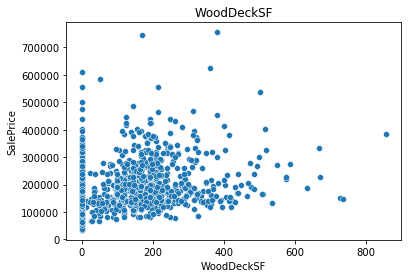

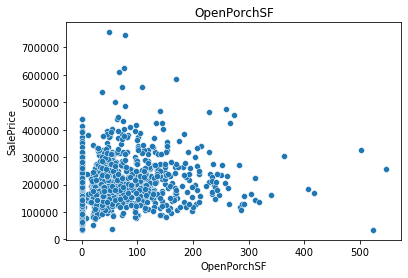

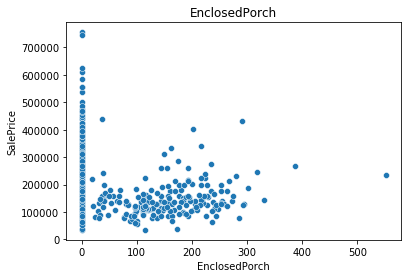

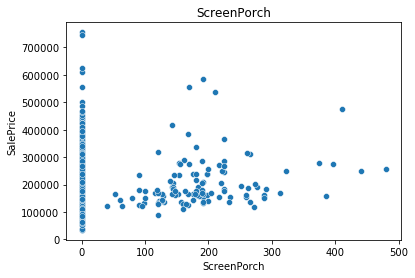

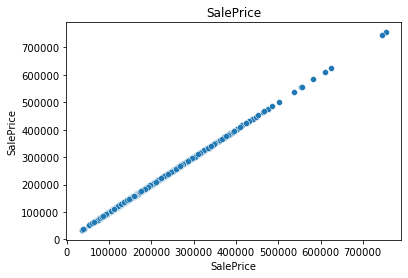

In [88]:
for cont_variable in cont_variables:
    sns.scatterplot(x=cont_variable, y='SalePrice', data=dataset)
    plt.title(cont_variable)
    plt.show()